# FIT1043 Introduction to Data Science 

## Assignment 2

#### Name: Jonathan Wong Leong Shan
#### Student ID: 31435297

___

# 1. Introduction

The purpose of this assignment is to read and describe the essay features data using basic statistics, split the dataset into training, testing and carry out predictions on given datasets.

This assignment conducts multi-class classification using Support Vector Machine / Regression (SVM), using the Quadratic Weighted Kappa (QWM) to measure similarities between predicted and actual scores and to carry out independent model evaluation through submission for an in-class Kaggle competition.

The data includes 17 essay features, essay ID numbers and their scores based on these features.

The report's rough outline is as follows:

1. Introduction
2. Supervised Learning
3. Classification
4. Kaggle Submission
5. Conclusion


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

data = pd.read_csv('FIT1043-Essay-Features.csv')

In [2]:
data.head() # Visualise the first 5 rows of the file

,essayid,chars,words,commas,apostrophes,punctuations,avg_word_length,sentences,questions,avg_word_sentence,POS,POS/total_words,prompt_words,prompt_words/total_words,synonym_words,synonym_words/total_words,unstemmed,stemmed,score
0,1457,2153,426,14,6,0,5.053991,16,0,26.625000,423.995272,0.995294,207,0.485915,105,0.246479,424,412,4
1,503,1480,292,9,7,0,5.068493,11,0,26.545455,290.993103,0.996552,148,0.506849,77,0.263699,356,345,4
2,253,3964,849,19,26,1,4.669022,49,2,17.326531,843.990544,0.994100,285,0.335689,130,0.153121,750,750,4
3,107,988,210,8,7,0,4.704762,12,0,17.500000,207.653784,0.988828,112,0.533333,62,0.295238,217,209,3
4,1450,3139,600,13,8,0,5.231667,24,1,25.000000,594.652150,0.991087,255,0.425000,165,0.275000,702,677,4


In [3]:
data.shape # Identify how many rows and columns are in the file

(1332, 19)

### b. Importing the necessary libraries, read the file (‘FIT1043-EssayFeatures.csv‘), and provide some description of the data you have read (you do not need to repeat the description given in this file for each field)

The data in the CSV file named "FIT1043-Essay-Features" contains features of an essay which contribute to the respective score number from 1 to 6. 
This data has 1332 rows and 19 columns. Each essay is identified with its essayid.

# 2. Supervised Learning 

### a. Explain supervised machine learning, the notion of labelled data, and the training and test datasets.

Supervised machine learning is the process of an algorithm learning from the training data set where the algorithm develops a predictive model based on input and ouput data. Then, the algorithm runs evaluation on test data sets to ensure its predictions are accurate enough.

Labelled data are raw data which are identified and has been labelled with an informative label which gives context for the machine learning model to learn from it. In supervised machine learning, all data is labelled which means that we know the correct answers for the next output variables. Based on these labelled data sets, it learns to predict and deduce quite accurately what the next output variable would be.  

Two non-overlapping datasets can be obtained by splitting the data we have into the training set and the test set.

- Training set is used to do machine learning and the building of the model
- Test set is used by the algorithm to run evaluation on it and based on the predicted output data, we can compare it with the true test set's output variable to compare its accuracy.

Typically, the training set has a higher proportion as compared to the test set because the more data is used for training, the more accurate the algorithm's predictions will be.



### b. Separate the features and the label (Hint: the label in this case is the ‘score’)

In [4]:
X = data.iloc[:,1:17].values # Obtaining the essay features
y = data.iloc[:,18].values   # Obtaining the scores of the essays

### c. Use the sklearn.model_selection.train_test_split function to split your data for training and testing.

Assuming 75% is kept for the training data and 25% for the testing data.

In [5]:
# Split essay features and scores data into non-overlapping 80% training and 20% testing data 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.35, random_state = 0
)

# 3. Classification

### a. Explain the difference between binary and multi-class classification

Binary classification is the process of classifying a set's elements into two groups. For example, if a fish is either Tuna or Bass where both Tuna and Bass are two different classes.

Multi-class classification means categorizing data into more than two classes based on their similarities. For example, we can identify what species of a plant is based on multiple features such as petal length, petal width, color and other features.

### b. In preparation for Support Vector Machine/Regression, your data should be normalised/scaled.

#### i. Describe what you understand from this need to normalise data (this is in your Week 7 tutorial/laboratory).

Normalization of data is the process of scaling data sets so they have a mean of 0 and a certain standard deviation. This is so that each feature contributes proportionately to the final result. In this assignment, normalizing the data allows each essay feature to contribute proportionately to the score of each essay 

#### ii. Choose and use the appropriate normalisation functions available in sklearn.preprocessing and scale the data appropriately

In [6]:
## Carry out feature scaling on training and test data
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train) 
# X_test = sc.transform(X_test)

### c. Use the Support Vector Machine/Regression algorithm to build the model.

#### i. Describe SVM (in relation to Linear Regression). 

By definition, a Support Vector Machine is a supervised machine learning algorithm that can be employed for both classification and regression purposes.

However, to further describe an SVM, we can imagine a linearly separable dataset which means we can simply draw a line between two groups of data making it possible to classify any new data into their related class.

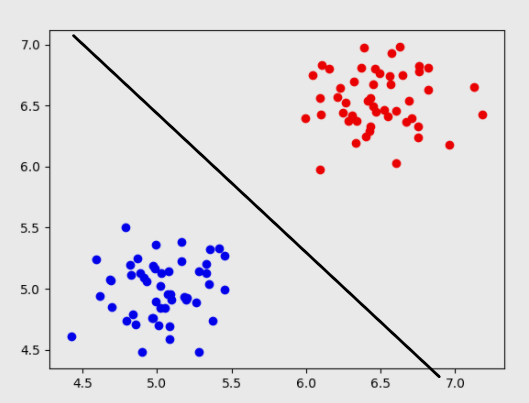

However, problems arises when more data are taken into account because the same line separating both classes should, most of the time, not look the same for the new extended dataset. A linear classifier, which separate data using a line or plane or a hyperplane, does not find the best decision boundary in the dataset and there might be multiple decision boundaries.

In cases like this, SVM or Support Vector Machine algorithms can handle these problems very well as they maximize the margin using the support vectors.

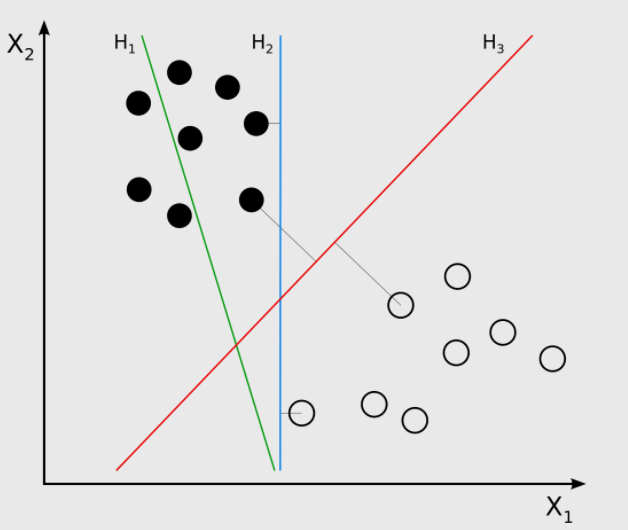

SVM algorithms are commonly called maximum-margin classifiers. This can be explained by referring to the image above. 

    Before I explain it, it is important to know that margin means the dist-ance from the closest vectors to  ㅤthe line and those vectors closest ㅤto the line are called support vectors. 
    
From the image, it is obvious H1 does not separate all distinct data into its own classes as some black data points are in the same class with the white data points. Line H2 does separate both classes but it is possible to find a line which separates both classes and has a larger margin. That line is H3 as the distance between the support vectors to the line is the furthest, therefore has the maximum margin. The data points or vectors helps in finding the optimum decision boundary and that is why they are called support vectors.

#### ii. In SVM/SVR, there is something called the kernel. Explain what you understand from it.

Kernels are a set of mathematical functions that take data as input then computes the required result. These kernels are beneficial when the data is not linearly separable they are capable of changing the shape of the dataset without changing the relationships between the data. Doing this allows us to find a function that maps the non-linearly separable dataset into a dataset that is linearly separable.

#### iii. Write the code to build the model using your training dataset. (Note: You are allowed to engineer or remove features as you deem appropriate)


In [7]:
# Build a model with linear kernel
SVM_Model = SVC(kernel = 'linear') 
SVM_Model.fit(X_train,y_train)

SVC(kernel='linear')

### d. Predict

#### i. Using the testing dataset you created in 2(c) above, conduct the prediction for the ‘score’ (label).

In [8]:
# Predict the scores using the model created
y_pred = SVM_Model.predict(X_test)

In [9]:
SVM_Model.score(X_test, y_test)

0.6659528907922913

#### ii. Display the confusion matrix (it should look like a 6x6 matrix). Unlike the lectures, where it is just a 2x2, you are now introduced to a multclass classification.

In [10]:
# Computing the 6x6 confusion matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[  0,   2,   0,   0,   0,   0],
       [  1,  16,  16,   1,   0,   0],
       [  0,   2, 139,  53,   1,   0],
       [  0,   0,  54, 153,   4,   0],
       [  0,   0,   1,  19,   3,   0],
       [  0,   0,   0,   2,   0,   0]], dtype=int64)

#### iii. Explain Quadratic Weighted Kappa (QWK). 

The Quadratic Weighted Kappa measures the agreement between two ratings. The metric of QWK can be from 0 to 1 where 0 means there is a random agreement between the raters whereas 1 means all the raters agree. The QWK is calculated between the known scores and the predicted scores.

#### iv. Use the sklearn.metrics library to code and obtain the QWK score.

In [11]:
# Assign the copy of Confusion Matrix to variable O
O = cm.copy()

In [12]:
# Weighted Matrix
#   An N-by-N matrix of weights, w is calculated based on the difference 
#   between actual and predicted rating scores 
w = np.zeros((6,6))

Compute the weighted matrix with formula:
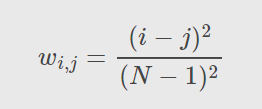

In [13]:
# The weighted matrix is calculated below
N = 6
for i in range(len(w)):
    for j in range(len(w)):
        w[i][j] = float( ( (i - j)**2) / (N-1)**2 )
        
# Calculation of actual histogram vector
y_actual_hist = np.zeros([N])

for i in y_test:
    y_actual_hist[i-1] += 1
    
# Calculation of predicted histogram vector
y_pred_hist=np.zeros([N]) 
for i in y_pred: 
    y_pred_hist[i-1]+=1    

In [14]:
# Calculate the expected matrix E
E = np.outer(y_actual_hist, y_pred_hist)

In [15]:
# Normalize E and O so they have the same sum
E = E/E.sum()

O = O/O.sum()


Calculate Quadratic Weighted Kappa (QWK). Formula:
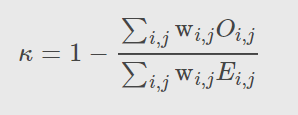

In [16]:
# Calculate and display the QWK value in string format.
num = 0
den = 0

for i in range(len(w)):
    for j in range(len(w)):
        num += w[i][j]*O[i][j]
        den += w[i][j]*E[i][j]
    
result = num/den
QWK = (1-result)
print('The QWK value is {}'.format(round(QWK,4)))

The QWK value is 0.6052


# 4. Kaggle Submission

#### a. Read the ‘FIT1043-Essay-Features-Submission.csv’ file and use the model you built earlier to predict the ‘score’.

In [17]:
# Read FIT1043-Essay-Features-Submission.csv
data_sub = pd.read_csv("FIT1043-Essay-Features-Submission.csv")

In [18]:
# Extract the essay features (excludes essayid)
X_sub = data_sub.iloc[:, 1:17].values

In [19]:
# Predict the scores for the essays based on their features in X_sub
y_sub_pred = SVM_Model.predict(X_sub)

In [20]:
# Put all the predicted value of the scores into a dataframe
y_sub_pred = pd.DataFrame(y_sub_pred) 

In [21]:
# Read the csv file used to submit predictions
answer_file = pd.read_csv("31435297-JonathanWongLeongShan-1.csv")

In [22]:
# Replace NaN values in score column with predicted values
answer_file["score"] = y_sub_pred
answer_file.reset_index(drop=True,inplace=True)

In [23]:
# Save the modified file containing the predicted score values
answer_file.to_csv('31435297-JonathanWongLeongShan-1.csv', index=False)

# 5. Conclusion

Using the model, we evaluated the test data set and obtained a QWK score of 0.6312 which is a fairly good score. This means that the model is agreed by enough raters to be better than average.

When the model is applied to the essays in FIT1043-Essay-Features-Submission.csv, the scores column has a majority of 4 scores and has a minimum number of 2 scores. 

# 6. References

[1] “Understanding SVM and SVR for Classification and Regression – MachineCurve,” MachineCurve, Sep. 20, 2019. https://www.machinecurve.com/index.php/2019/09/20/intuitively-understanding-svm-and-svr/#what-if-data-is-not-linearly-separable-kernels (accessed Apr. 29, 2021).

[2] Kunaal Naik, “Machine Learning Tutorial with sklearn SVM Classification (SVC),” YouTube. Mar. 18, 2020, Accessed: Apr. 29, 2021. [Online]. Available: https://www.youtube.com/watch?v=KHGXpnueZlc.

[3] C. Maklin, “Support Vector Machine Python Example - Towards Data Science,” Medium, Aug. 12, 2019. https://towardsdatascience.com/support-vector-machine-python-example-d67d9b63f1c8 (accessed Apr. 29, 2021).

[4] prashant111, “Simple Explanation of Quadratic Weighted Kappa,” Kaggle.com, Apr. 24, 2020. https://www.kaggle.com/prashant111/simple-explanation-of-quadratic-weighted-kappa (accessed Apr. 29, 2021).

[5] “Master Machine Learning Algorithms,” Google Books, 2011. https://books.google.com.my/books/about/Master_Machine_Learning_Algorithms.html?id=n--oDwAAQBAJ&printsec=frontcover&source=kp_read_button&redir_esc=y#v=onepage&q&f=false (accessed Apr. 29, 2021).
‌
